In [22]:
# Importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sn

#Reading files
Train_Data = pd.read_csv('Train_Data.csv').values
ds = np.copy(Train_Data)
Train_Labels = pd.read_csv('Train_Labels.csv').values
Test_Data = pd.read_csv('Test_Data.csv').values
Test_Labels = pd.read_csv('Test_Labels.csv').values
m, n = Train_Data.shape
t, _ = Test_Data.shape


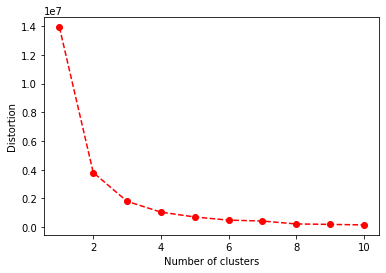

In [23]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(Train_Data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, '--ro')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

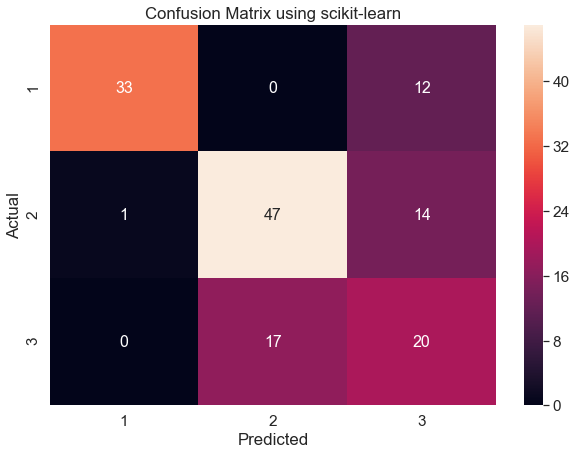

In [24]:
k = 3
km = KMeans(
    n_clusters=k, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(Train_Data)+1
clusters = [[] for i in range(k)]
for i in range(m):
    clusters[y_km[i]-1].append(i)
    
U = clusters.copy()
for i in range(k):
    for j in range(len(clusters[i])):
        U[i][j] = Train_Labels[clusters[i][j]][0]

classes = [0 for x in range(k)]
for i in range(k):
    L, counts = np.unique(U[i], return_counts=True)
    counts = np.asarray(counts)
    L = np.asarray(L)
    M = np.argmax(counts)
    classes[i] = L[M]

y_pred = y_km.copy()
for i in range(m):
    y_pred[i] = classes[y_pred[i]-1]
    
confusion = confusion_matrix(Train_Labels, y_pred)
df_cm = pd.DataFrame(confusion, range(1,k+1), range(1,k+1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using scikit-learn')
plt.show()